***ANALYSIS OF PALMER PENGUINS DATA.***

In [2]:
# Import Libraries
import numpy as np 
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns






In [3]:
# Read file path
filepath='/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv'
palmer= pd.read_csv(filepath)

In [4]:
# Analyse the data
palmer.head(5)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Converted the categorial to numeric variables
palmer['species']=pd.factorize(palmer.species)[0]

In [8]:

# To check whether the data has any null values. Need to refine the data
palmer.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# Tried using the mean for imputation but the values of body mass becomes much bigger for the Adelie.
palmer.fillna(method='bfill',inplace=True)

In [10]:
# Feature selection
# Did one hot encoding for categorial variables

features=['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g',]
y=palmer['species']
X=palmer[features]
X=pd.get_dummies(palmer[features])




In [11]:
X.shape

(344, 7)

In [12]:
# Checking the balance of the dataset
# The data is balanced. Wont apply undersampling.
palmer['species'].value_counts()



0    152
2    124
1     68
Name: species, dtype: int64

In [13]:
# Checking the Baseline Accuracy
#Aim is to beat teh baseline accuracy in training the model
152/(152+124+68)

0.4418604651162791

**DATA VISUALISATION**

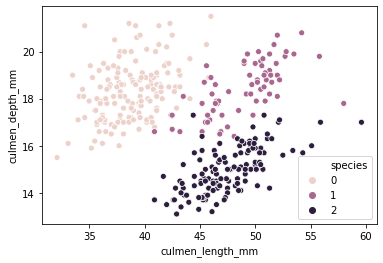

In [14]:

sns.scatterplot(x=palmer['culmen_length_mm'],y=palmer['culmen_depth_mm'],hue=palmer['species'])


# From the plot we can visualize that the Adelie species tend to have shorter beaks but are very thick
# It can be one of their distinguishing feature.

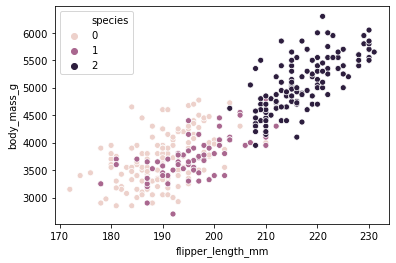

In [15]:
sns.scatterplot(x=palmer['flipper_length_mm'],y=palmer['body_mass_g'],hue=palmer['species'])
# Gentoo species stands out


Text(0.5, 1.0, 'Palmer Heroes')

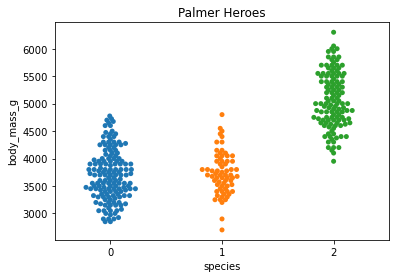

In [16]:
sns.swarmplot(x='species',y='body_mass_g',data=palmer)
plt.title('Palmer Heroes')

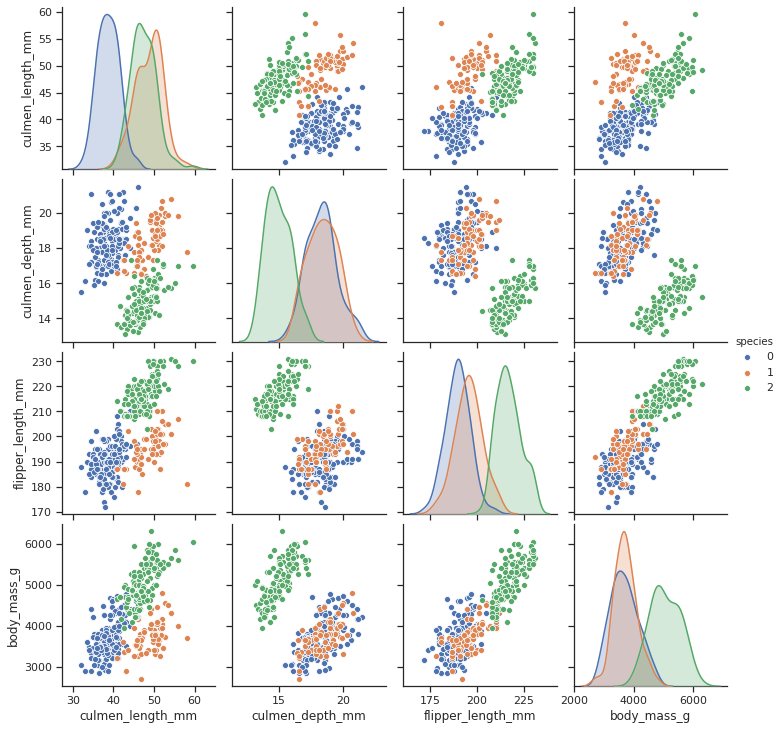

In [17]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(data=palmer,hue='species')
# EDA with a pairplot to visualize



In [20]:
# Test Train Split
# Importing the necessaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [21]:
# Train and fit the model
X,X_test,y,y_test=train_test_split(X,y,test_size=0.4,random_state=3)


In [22]:
# Ecaluating and predicting the model
# I tried to preedict using RandomForest,KNeighbors and xGboost
model =RandomForestClassifier(n_estimators=800,random_state=0)
#model=KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
pred=model.predict(X_test)
Final_Acc =(accuracy_score(pred,y_test))
print('The final accuracy of your model is',accuracy_score(pred,y_test))
print('See the matrix:',classification_report(pred,y_test))

# Random Forest has better accuracy here than kneighbors
# Maybe it kills the overfitting
# inclusion of categorial variables boosted my accuracy.

The final accuracy of your model is 1.0
See the matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [26]:
# Cross validation is a better way to checkout the accuracy
from sklearn.model_selection import cross_val_score

score= cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
print(score)

0.9852380952380952


In [29]:
from xgboost import XGBClassifier
model1=XGBClassifier(n_estimators=1000,learning_rate=0.1,n_jobs=4)
model1.fit(X,y,early_stopping_rounds=5,eval_set=[(X,y)],verbose=False)
predi=model.predict(X_test)
print('The final accuracy of your model is',accuracy_score(y_test,predi))
print(classification_report(y_test,predi))

# n_ jobs is not mandatory for a cloud editor as i use on kaggle because i dont make use of cores there
# Parameter tuning thus helped me in fetching a more accurate model.

# Xgboost also is more precise  can say because i applied it before checking the balance of the dataset and
# provided me a better accuracy.


The final accuracy of your model is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [27]:
# It is very fascinating that i found culmen length to be the most important

import eli5
from eli5.sklearn import PermutationImportance
 
perm = PermutationImportance(model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1725 ± 0.0462,culmen_length_mm
0.0609 ± 0.0312,island_Dream
0.0275 ± 0.0169,culmen_depth_mm
0.0174 ± 0.0235,flipper_length_mm
0 ± 0.0000,island_Torgersen
0 ± 0.0000,island_Biscoe
0 ± 0.0000,body_mass_g


In [ ]:
#From this model i found out that cv scores and perm importance are very important. The best algo after testing a few
# came out to be the xgboost because it provided good accuracy even when i didnt check the baseline accuracy.